In [601]:
%cd ~/src/laboratori/0304

/home/jovyan/src/laboratori/0304


# **Introduzione al Machine Learning -- laboratorio 3 e 4**

Usare scipy.stats per:
1. Plottare pdf e CdF di una legge normale $\mu = 100$, e $\sigma = 15$ (Q.I.)
2. Generare 2000 vv.aa. con questa distribuzione
3. Plottare l'istogramma del campione sovrapposto alla pdf

Importa la distribuzione normale da `scipy.stats`, definisce i parametri `mu` e `sigma` e crea un oggetto distribuzione `dist`.

In [602]:
from scipy.stats import norm

mu = 100
sigma = 15

dist = norm(loc=mu, scale=sigma)

> Documentazione: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

Mostra i parametri (keywords) con cui è stato creato l'oggetto distribuzione.

In [603]:
dist.kwds

{'loc': 100, 'scale': 15}

Calcola il valore della funzione di densità di probabilità (PDF) nel punto `x = 100` (la media).

In [604]:
dist.pdf(100)

np.float64(0.02659615202676218)

In [605]:
import matplotlib.pyplot as plt
import numpy as np

Crea un array di punti `x` nell'intervallo [40, 160], calcola i valori della PDF `y` corrispondenti e plotta la PDF.

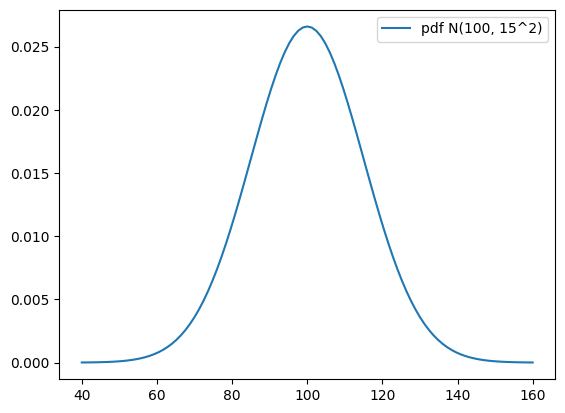

In [606]:
x = np.linspace(40, 160, 101)

y = dist.pdf(x)

plt.plot(x, y, label=f'pdf N({mu}, {sigma}^2)')
plt.legend()

plt.show()

Calcola i valori della funzione di ripartizione cumulativa (CDF) `z` per i punti `x` e plotta la CDF.

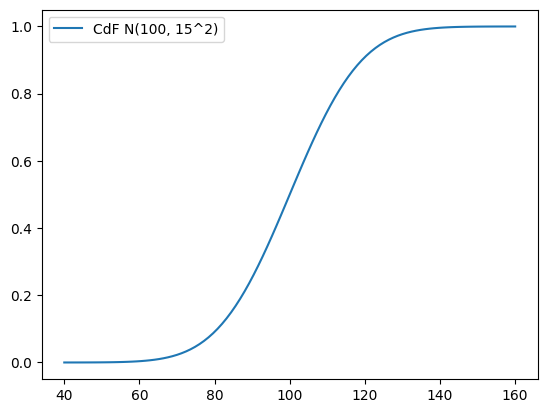

In [607]:
z = dist.cdf(x)

plt.plot(x, z, label=f'CdF N({mu}, {sigma}^2)')
plt.legend()

plt.show()

Genera un singolo campione casuale (random variate) dalla distribuzione normale definita.

In [608]:
dist.rvs()

np.float64(111.38103817857257)

Genera un campione di `n = 2000` valori casuali dalla distribuzione normale specificata.

In [609]:
n = 2000
sample = norm.rvs(loc=mu, scale=sigma, size=n)
sample

array([ 93.5767041 ,  84.17585868,  69.2804654 , ...,  92.73717513,
       103.7444501 ,  88.72251262])

Plotta un istogramma del campione generato, usando bin di larghezza 5 nell'intervallo [0, 200].

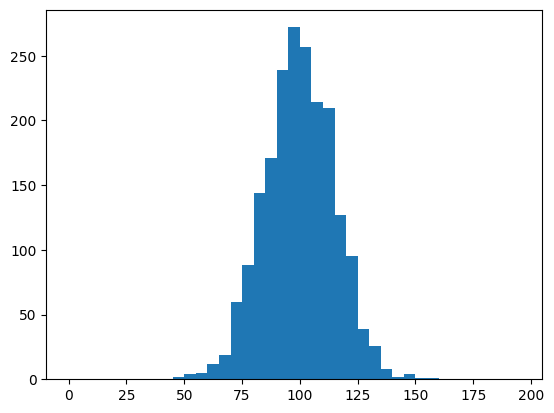

In [610]:
plt.hist(sample, bins=np.arange(0, 200, 5))
plt.show()

Calcola i conteggi (`count`) e i bordi dei bin (`borders`) per l'istogramma del campione usando `np.histogram`.

In [611]:
count, borders = np.histogram(sample, bins=np.arange(0, 200, 5)) # borders potrebbe essere _ perche non lo usiamo

Mostra le dimensioni (shape) degli array `borders` e `count` ottenuti da `np.histogram`.

In [612]:
borders.shape, count.shape

((40,), (39,))

Plotta l'istogramma usando `plt.bar`, posizionando le barre sui bordi sinistri dei bin (`borders[:-1]`).

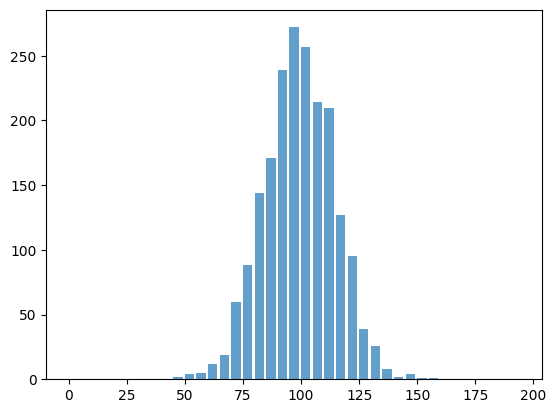

In [613]:
plt.bar(borders[:-1], count, width=4, align='edge', alpha=0.7)
plt.show()

Calcola i centri dei bin e plotta l'istogramma usando `plt.bar` con le barre centrate. Normalizza l'altezza delle barre per il numero totale di campioni `n`.

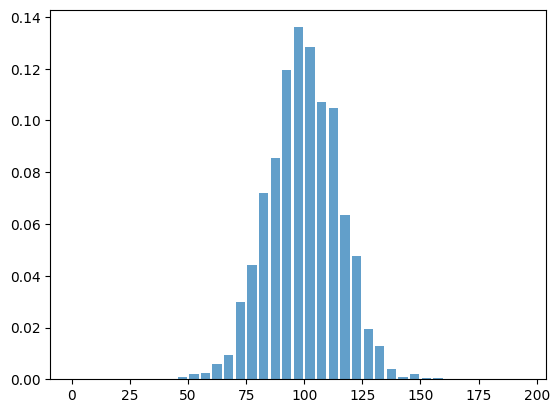

In [614]:
centers = (borders[:-1] + borders[1:]) / 2

plt.bar(centers, count / n, width=4, align='center', alpha=0.7)

# ma in questo caso l'integrale e' 5 perche la somma e' 1 ma gli intervalli
# sono di 5 elementi

plt.show()

Plotta l'istogramma normalizzato per l'area (dividendo i conteggi per `n` e per la larghezza del bin, 5) per approssimare la densità. Sovrappone la PDF teorica per confronto.

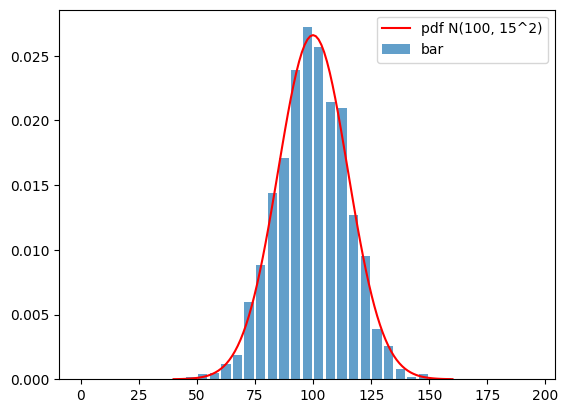

In [615]:
# divido ancora per 5
plt.bar(centers, count / n / 5, width=4, alpha=0.7, label='bar')
# questa cosa viene fatta in automatico da density=True

plt.plot(x, y, label=f'pdf N({mu}, {sigma}^2)', color='red')
plt.legend()

plt.show()

Plotta l'istogramma del campione usando `plt.hist` con l'opzione `density=True`, che normalizza automaticamente l'istogramma per rappresentare una densità. Sovrappone la PDF teorica.

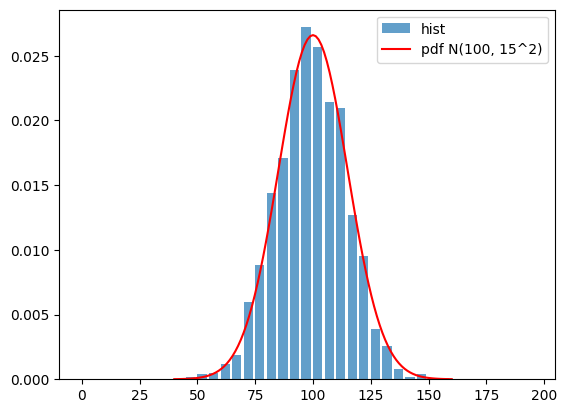

In [616]:
# faccio la stessa cosa ma con density=True
plt.hist(sample, bins=np.arange(0, 200, 5), density=True, width=4, alpha=0.7, label='hist')

plt.plot(x, y, label=f'pdf N({mu}, {sigma}^2)', color='red')
plt.legend()

plt.show()

Genera un nuovo campione di `n=2000` valori e calcola il valore massimo (`max_value`) nel campione.

In [617]:
max_value = norm.rvs(loc=mu, scale=sigma, size=n).max()
max_value

np.float64(148.25493120085974)

Calcola la probabilità che una variabile casuale normale sia maggiore del `max_value` trovato, usando la survival function (`sf = 1 - cdf`).

In [618]:
norm.sf(max_value, loc=mu, scale=sigma) # sf = 1 - cdf

np.float64(0.0006477033482243708)

### Esercizio
1. Studiare la distribuzioone del massimo delle 2000 Gaussiane (generando 1000 volte 2000 Gaussiane)
2. Generare direttamente 10000 massimi di 2000 Gaussiane come sopra (senza generare ogni volta le 2000 Gaussiane)

Genera una matrice `X` di 1000 righe e 2000 colonne, dove ogni elemento è un campione dalla distribuzione normale. Calcola il massimo `Z` per ogni riga (cioè il massimo di 2000 campioni), ottenendo 1000 valori massimi.

In [619]:
X = norm.rvs(loc=mu, scale=sigma, size=(1000, 2000))
Z = np.max(X, axis=1)

Plotta un istogramma (normalizzato come densità) dei 1000 valori massimi `Z` calcolati.

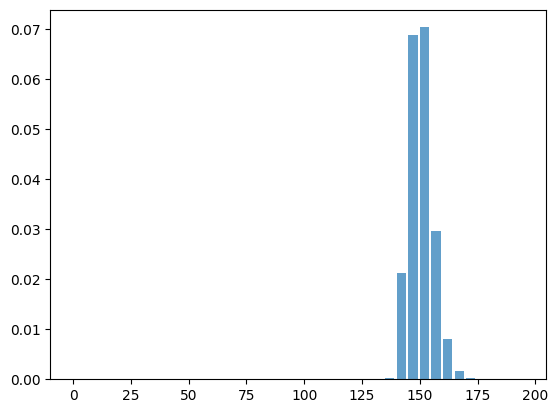

In [620]:
plt.hist(Z, bins=np.arange(0, 200, 5), density=True, width=4, alpha=0.7, label='hist')
plt.show()

Plotta la funzione di ripartizione empirica (ECDF) dei 1000 valori massimi `Z`.

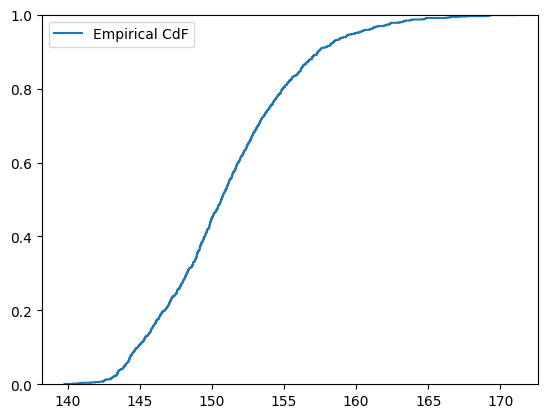

In [621]:
plt.ecdf(Z, label='Empirical CdF')
plt.legend()
plt.show()

Calcola la mediana dei 1000 valori massimi `Z`.

In [622]:
np.median(Z)

np.float64(150.65424175832868)

Importa la distribuzione Beta da `scipy.stats`.

In [623]:
from scipy.stats import beta

Genera `N = 100000` campioni `U_max` dalla distribuzione Beta(a=n, b=1), dove `n = 2000`. Questo corrisponde alla distribuzione del massimo di `n` variabili uniformi in [0,1].

In [624]:
# Genero 100000 massimi di 2000 uniformi su [0,1]
N = 100000
n = 2000

U_max = beta(a=n, b=1).rvs(size=N)
U_max

array([0.99930692, 0.99952527, 0.99988561, ..., 0.99905216, 0.99871445,
       0.9995518 ])

Applica la funzione quantile inversa (PPF) della distribuzione normale ai campioni `U_max` per generare direttamente `N` campioni del massimo di `n` variabili normali, sfruttando la trasformazione inversa.

In [625]:
# Genero 100000 massimi di 2000 uniformi come sopra
norm.ppf(U_max, loc=mu, scale=sigma)

array([147.96278765, 149.5763887 , 155.27356528, ..., 146.59160862,
       145.22267519, 149.81759954])

Siano $X_1, \dots, X_n$ variabili indipendenti con $X_i \sim \mathcal{N}(\mu,\sigma^2).$

Definiamo $Z = \max_{i} X_i.$

Usando la trasformazione $X_i = F^{-1}(U_i)$ con $U_i \sim \mathrm{unif}(0,1)$, otteniamo  
$
Z = \max_{i} F^{-1}(U_i)
  = F^{-1}\!\bigl(\max_{i} U_i\bigr),
$
poiché $F$ e $F^{-1}$ sono crescenti. 

Quindi $\max_{i} U_i \sim \mathrm{Beta}(n,1).$


Genera `N` campioni `U_min` dalla distribuzione Beta(a=1, b=n). Questo corrisponde a `1 - U_max` ed è numericamente più stabile perché i valori sono vicini a 0 invece che a 1.

In [626]:
# C'e' da migliorare la precisione, perche stiamo lavorando con numeri vicino a 1
# e quindi la precisione e' bassa. Per l'architettura dei floating point conviene
# lavorare con numeri vicini a 0

U_min = beta(a=1, b=n).rvs(size=N)
U_min

array([1.01305968e-04, 2.42069670e-06, 5.97050269e-04, ...,
       1.91713664e-04, 6.37375993e-06, 1.40048331e-04])

Applica la funzione quantile inversa della survival function (ISF) della distribuzione normale ai campioni `U_min` per generare i massimi `Z_large`. `norm.isf(u) = norm.ppf(1-u)`, quindi questo è equivalente al metodo precedente ma con maggiore precisione numerica.

In [627]:
Z_large = norm.isf(U_min, loc=mu, scale=sigma)
Z_large

array([155.73606085, 168.57318766, 148.60428326, ..., 153.26853085,
       165.46592142, 154.49566787])

Plotta un istogramma (normalizzato come densità) dei campioni `Z_large` (massimi generati con il metodo più preciso).

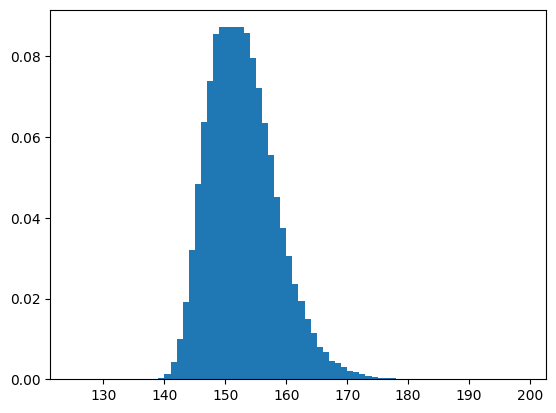

In [628]:
plt.hist(Z_large, bins=np.arange(125, 200, 1), density=True, width=4, label='hist')
plt.show()

Calcola la CDF teorica del massimo `cdf_max` usando la relazione $P(Z \le x) = P(\max X_i \le x) = P(F^{-1}(\max U_i) \le x) = P(\max U_i \le F(x)) = F_{\mathrm{Beta}(n,1)}(F(x))$. Plotta la CDF teorica e la ECDF dei campioni `Z_large`.

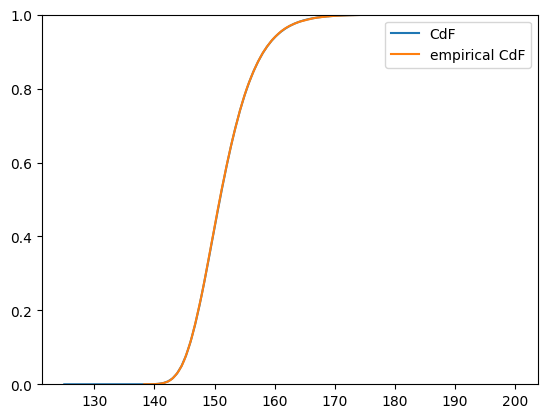

In [629]:
# Posso addirittura plottare la distribuzione esatta
x_large = np.linspace(125, 200, 101)
cdf_max = beta.cdf(norm.cdf(x_large, loc=mu, scale=sigma), a=n, b=1)

plt.plot(x_large, cdf_max, label='CdF')
plt.ecdf(Z_large, label='empirical CdF')
plt.legend()

plt.show()

Calcola la PDF teorica del massimo `pdf_max` derivando la CDF: $f_Z(x) = \frac{d}{dx} F_Z(x) = f_{\mathrm{Beta}(n,1)}(F(x)) \cdot f(x)$. Plotta la PDF teorica e l'istogramma (densità empirica) dei campioni `Z_large`.

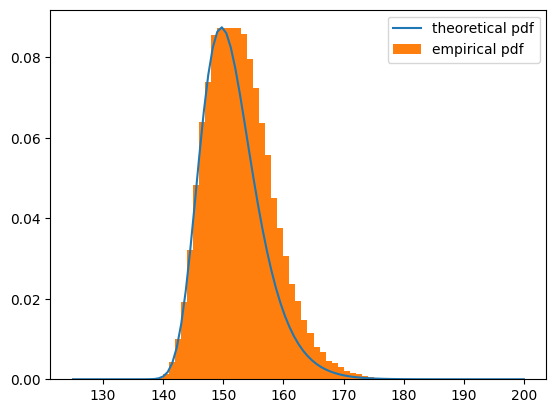

In [630]:
pdf_max = beta.pdf(norm.cdf(x_large, loc=mu, scale=sigma), a=n, b=1) * norm.pdf(x_large, loc=mu, scale=sigma)
plt.plot(x_large, pdf_max, label='theoretical pdf')
plt.hist(Z_large, bins=np.arange(125, 200, 1), density=True, width=4, label='empirical pdf')

plt.legend()
plt.show()

### Esercizio
1. Generare un processo di Poisson di parametro 1 e plottare $N_t$ per un po' di traiettorie
2. Studiare la distribuzione di $N_5$ e verificare che e' plausibilmente di Poisson con media 5

Importa la distribuzione esponenziale da `scipy.stats`. Definisce il numero di eventi `m` e il parametro `beta` (tasso medio = 1/scala = 1). Genera `m` tempi di interarrivo `T` da una distribuzione esponenziale con scala `beta=1` e li plotta.

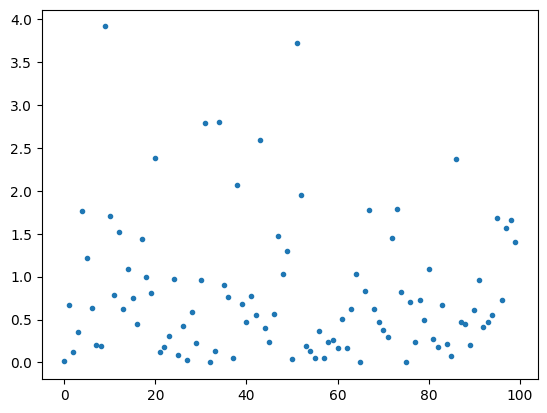

In [631]:
from scipy.stats import expon

m = 100
beta = 1

T = expon.rvs(scale=beta, size=m)
plt.plot(T, '.')
plt.show()

Calcola i tempi di arrivo degli eventi `S` facendo la somma cumulativa dei tempi di interarrivo `T`.

In [632]:
S = np.cumsum(T)
S

array([2.04765745e-02, 6.86320645e-01, 8.03183414e-01, 1.16344109e+00,
       2.93261911e+00, 4.14841613e+00, 4.78152839e+00, 4.98095904e+00,
       5.16879200e+00, 9.08223334e+00, 1.07885623e+01, 1.15781269e+01,
       1.31001988e+01, 1.37238596e+01, 1.48182023e+01, 1.55749676e+01,
       1.60267287e+01, 1.74595641e+01, 1.84495937e+01, 1.92603971e+01,
       2.16375392e+01, 2.17547419e+01, 2.19394572e+01, 2.22439613e+01,
       2.32204020e+01, 2.33050665e+01, 2.37295845e+01, 2.37600759e+01,
       2.43462605e+01, 2.45727325e+01, 2.55321159e+01, 2.83200666e+01,
       2.83256737e+01, 2.84600507e+01, 3.12608336e+01, 3.21641597e+01,
       3.29281326e+01, 3.29750032e+01, 3.50370051e+01, 3.57156059e+01,
       3.61822251e+01, 3.69575981e+01, 3.75101929e+01, 4.01021638e+01,
       4.05016963e+01, 4.07430474e+01, 4.13059342e+01, 4.27847670e+01,
       4.38136683e+01, 4.51123144e+01, 4.51544198e+01, 4.88703485e+01,
       5.08200402e+01, 5.10072194e+01, 5.11447512e+01, 5.12012572e+01,
      

Crea un array di punti temporali `t` da 0 a 20 per valutare il processo di Poisson.

In [633]:
t = np.linspace(0, 20, 1001)

Mostra la dimensione dell'array dei tempi di arrivo `S`.

In [634]:
S.shape

(100,)

Mostra la dimensione di `S` dopo averlo trasformato in un vettore colonna, utile per il broadcasting.

In [635]:
S.reshape(-1, 1).shape

(100, 1)

Mostra la dimensione di `t` dopo averlo trasformato in un vettore riga, utile per il broadcasting.

In [636]:
t.reshape(1, -1).shape

(1, 1001)

Utilizza il broadcasting per confrontare ogni tempo di arrivo `S` con ogni punto temporale `t`, creando una matrice booleana che indica se l'evento `i` è avvenuto prima del tempo `j`.

In [637]:
S.reshape(-1, 1) <= t.reshape(1, -1)

array([[False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Somma lungo l'asse degli eventi (axis=0) la matrice booleana per contare quanti eventi sono avvenuti fino a ciascun istante di tempo `t`.

In [638]:
np.sum(S.reshape(-1, 1) <= t.reshape(1, -1), axis=0)

array([ 0,  0,  1, ..., 20, 20, 20])

Calcola il numero di eventi `Nt` avvenuti fino a ciascun tempo `t` e plotta la traiettoria del processo di Poisson $N_t$.

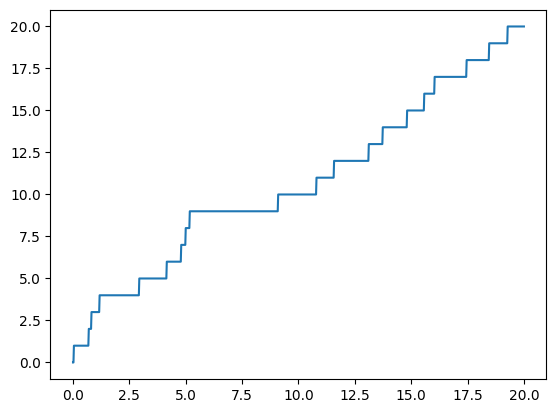

In [639]:
Nt = np.sum(S.reshape(-1, 1) <= t.reshape(1, -1), axis=0)

plt.plot(t, Nt)
plt.show()

Simula `k=5` traiettorie indipendenti del processo di Poisson. Genera i tempi di interarrivo `T` per le `k` traiettorie, calcola i tempi di arrivo `S`, calcola `Nt` per ogni traiettoria usando broadcasting su 3 dimensioni e plotta le `k` traiettorie.

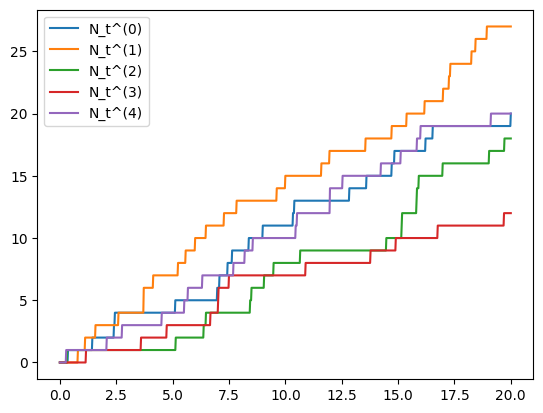

In [640]:
k = 5
T = expon.rvs(scale=beta, size=(m, k))
S = np.cumsum(T, axis=0)

t = np.linspace(0, 20, 1001)
Nt = np.sum(S.reshape(-1, k, 1) <= t.reshape(1, 1, -1), axis=0)

for i in range(k):
    plt.plot(t, Nt[i], label=f'N_t^({i})')
plt.legend()
plt.show()

Esegue una simulazione Monte Carlo per studiare la distribuzione di $N_5$. Genera `N=10000` traiettorie, calcola i tempi di arrivo `S` per ciascuna e conta quanti eventi `Nt` sono avvenuti fino al tempo `t=5` in ogni traiettoria.

In [641]:
# Faccio per 10000 la simulazione Monte Carlo
N = 10000
T = expon.rvs(scale=beta, size=(m, N))
S = np.cumsum(T, axis=0)

t = 5
Nt = np.sum(S <= t, axis=0)
Nt.shape

(10000,)

Plotta i valori di $N_5$ ottenuti dalle 10000 simulazioni.

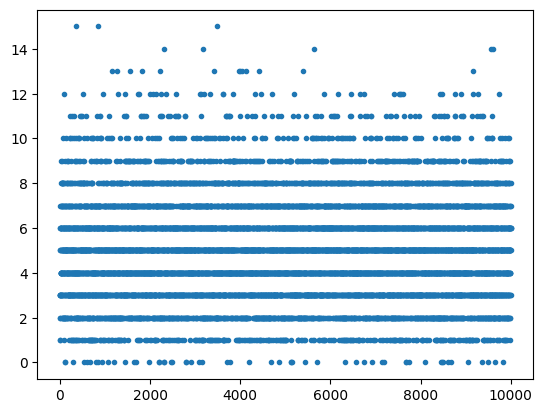

In [642]:
plt.plot(Nt, '.')
plt.show()

Importa la distribuzione di Poisson da `scipy.stats`. Plotta un istogramma (normalizzato come densità) dei valori simulati di $N_5$. Sovrappone la funzione di massa di probabilità (PMF) teorica di una distribuzione di Poisson con media $\lambda t = \beta t = 1 \times 5 = 5$ per confronto.

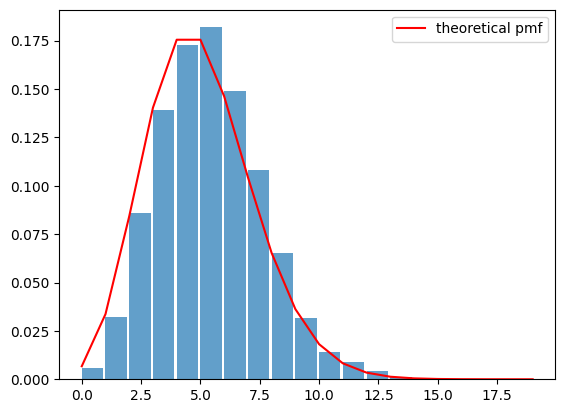

In [643]:
from scipy.stats import poisson

plt.hist(Nt, bins=np.arange(0, 20, 1), density=True, width=0.9, alpha=0.7)
plt.plot(np.arange(0, 20), poisson.pmf(np.arange(0, 20), mu=beta * t), 'red', label='theoretical pmf')
plt.legend()
plt.show()